<a href="https://colab.research.google.com/github/anasmita3/Alfido-Tech-Internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics:
               rate         votes  approx_costfor_two_people
count  41418.000000  41418.000000               41418.000000
mean       3.700353    351.726013                 603.268048
std        0.440637    882.697962                 464.327857
min        1.800000      0.000000                  40.000000
25%        3.400000     21.000000                 300.000000
50%        3.700000     73.000000                 500.000000
75%        4.000000    277.000000                 700.000000
max        4.900000  16832.000000                6000.000000


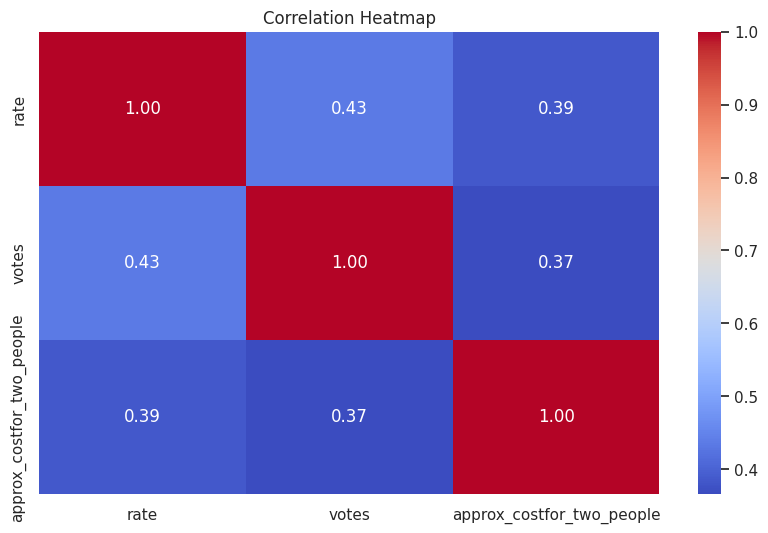

/tmp/ipython-input-11-3147595027.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


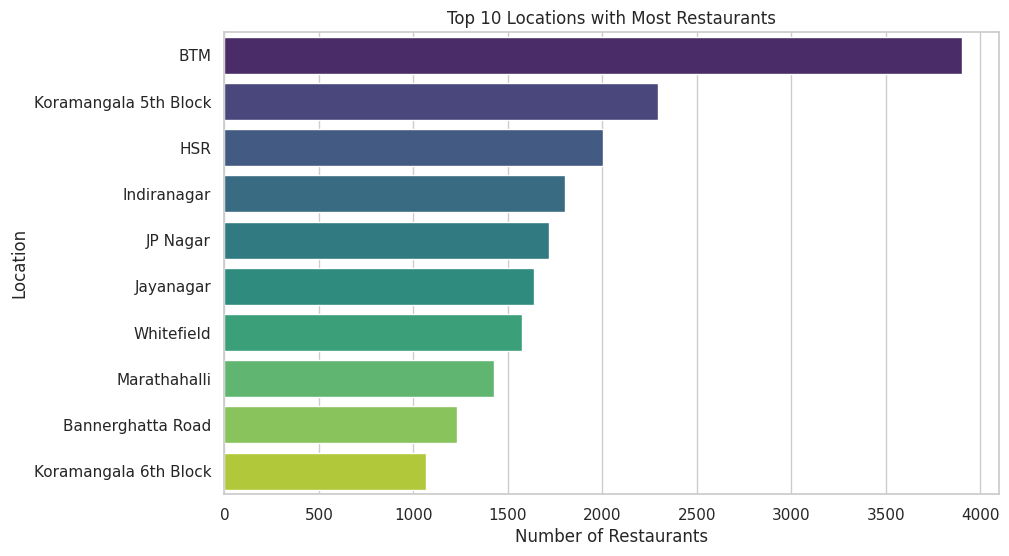

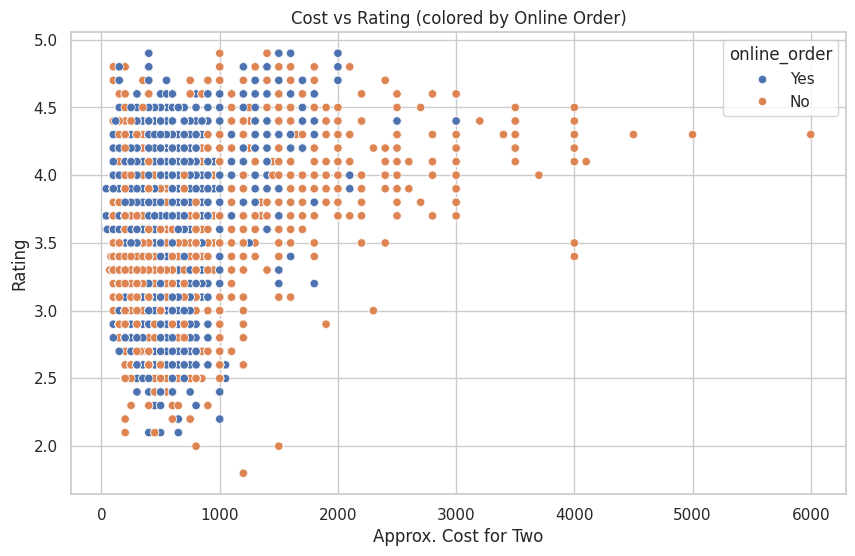

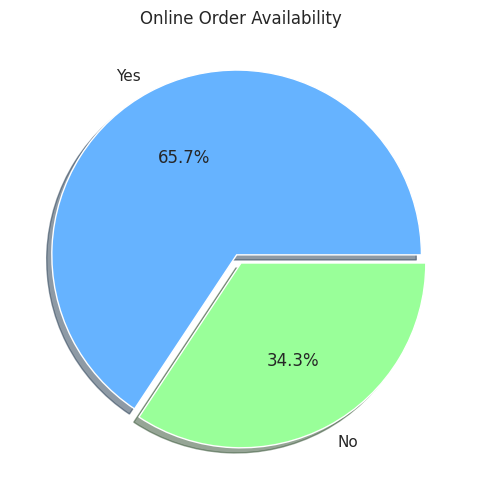

/tmp/ipython-input-11-3147595027.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='book_table', palette='Set2')


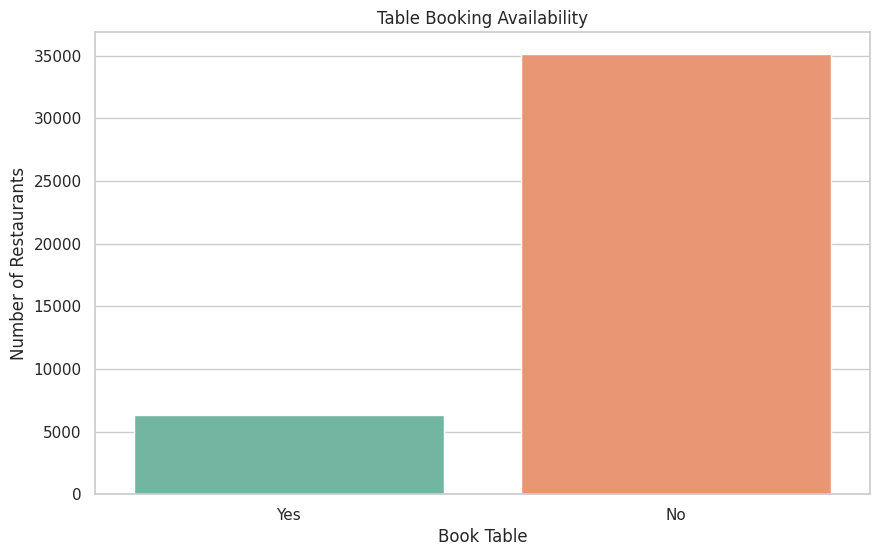

In [11]:
# ------------------------------------------
# 📦 1. Import Libraries and Load the Dataset
# ------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/zomato.csv", encoding="latin-1")

# ------------------------------------------
# 🧹 2. Clean the Data
# ------------------------------------------

# Clean column names: remove spaces, special chars
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)

# 🧼 Clean 'rate' column (extract only number from '4.1/5' etc.)
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# 🧼 Clean 'votes' column (remove commas and convert to float)
df['votes'] = df['votes'].astype(str).str.replace(',', '')
df = df[df['votes'].str.isnumeric()]
df['votes'] = df['votes'].astype(float)

# 🧼 Clean 'approx_costfor_two_people' column
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].astype(str).str.replace(',', '')
df = df[df['approx_costfor_two_people'].str.isnumeric()]
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].astype(float)

# 🧼 Drop rows with missing values in key columns
df = df.dropna(subset=['rate', 'votes', 'approx_costfor_two_people'])

# Reset index
df.reset_index(drop=True, inplace=True)

# ------------------------------------------
# 📊 3. Descriptive Statistics
# ------------------------------------------
print("Summary Statistics:")
print(df[['rate', 'votes', 'approx_costfor_two_people']].describe())

# ------------------------------------------
# 🔥 4. Correlation Heatmap
# ------------------------------------------
corr = df[['rate', 'votes', 'approx_costfor_two_people']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------------------
# 📍 5. Top 10 Most Common Locations
# ------------------------------------------
top_locations = df['location'].value_counts().head(10)

sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 10 Locations with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()

# ------------------------------------------
# 💰 6. Cost vs Rating (Scatter Plot)
# ------------------------------------------
sns.scatterplot(data=df, x='approx_costfor_two_people', y='rate', hue='online_order')
plt.title("Cost vs Rating (colored by Online Order)")
plt.xlabel("Approx. Cost for Two")
plt.ylabel("Rating")
plt.show()

# ------------------------------------------
# 📦 7. Online Order Availability (Pie)
# ------------------------------------------
df['online_order'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff', '#99ff99'],
    labels=['Yes', 'No'],
    explode=[0.05, 0],
    shadow=True
)
plt.title("Online Order Availability")
plt.ylabel('')
plt.show()

# ------------------------------------------
# 🍽️ 8. Table Booking Availability (Bar)
# ------------------------------------------
sns.countplot(data=df, x='book_table', palette='Set2')
plt.title("Table Booking Availability")
plt.xlabel("Book Table")
plt.ylabel("Number of Restaurants")
plt.show()


/tmp/ipython-input-12-1284638962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='cubehelix')


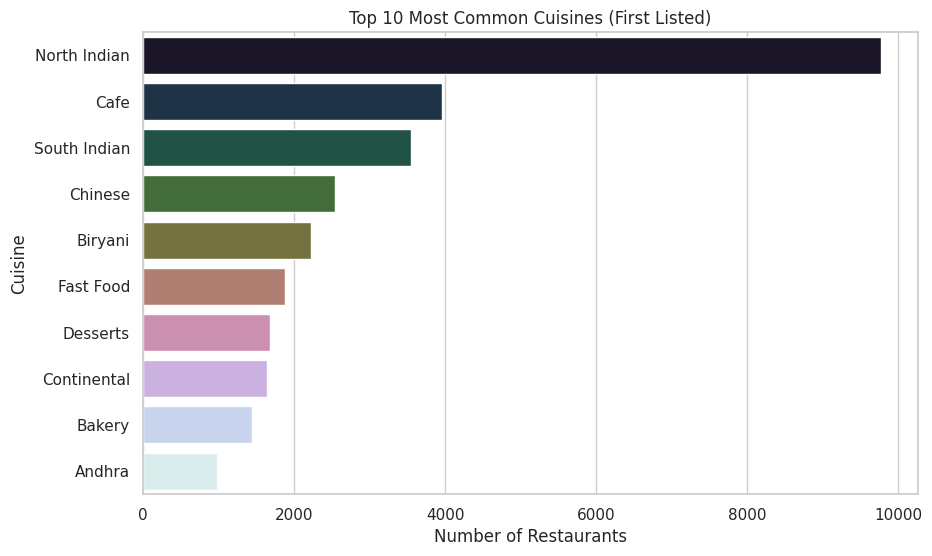

In [12]:
# Count most frequent cuisines (first listed only)
df['cuisines_main'] = df['cuisines'].astype(str).apply(lambda x: x.split(',')[0].strip())

top_cuisines = df['cuisines_main'].value_counts().head(10)

sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='cubehelix')
plt.title("Top 10 Most Common Cuisines (First Listed)")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


/tmp/ipython-input-13-1489001641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='crest')


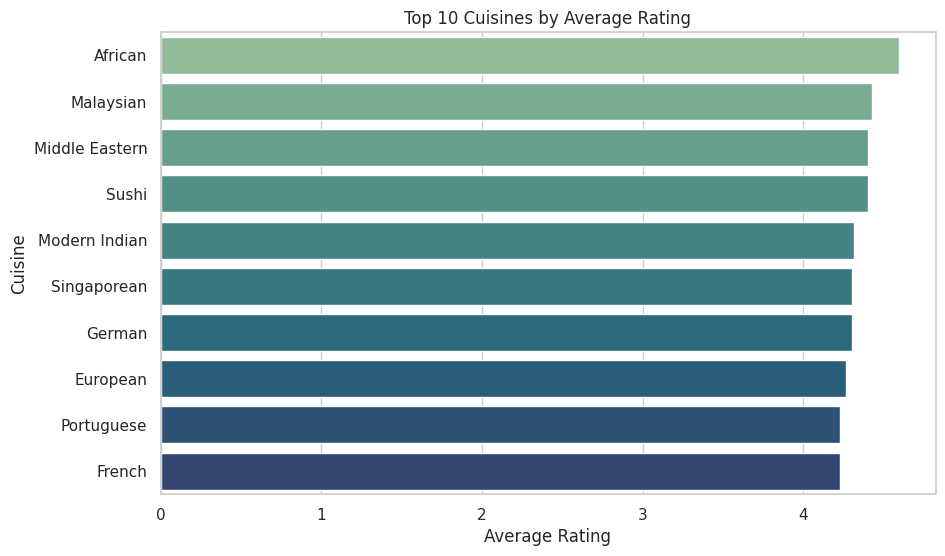

In [13]:
avg_rating_cuisine = df.groupby('cuisines_main')['rate'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='crest')
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()


In [14]:
# Create rating category
df['rating_category'] = pd.cut(df['rate'], bins=[0, 3.5, 4.0, 5.0], labels=['Low', 'Average', 'High'])


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Prepare data
X = df[['votes', 'approx_costfor_two_people']]
y = df['rating_category']

# Remove rows with null y
X = X[y.notnull()]
y = y[y.notnull()]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Confusion Matrix:
 [[1799  256 1524]
 [ 866  870   52]
 [ 747   11 2159]]

Classification Report:
               precision    recall  f1-score   support

     Average       0.53      0.50      0.51      3579
        High       0.77      0.49      0.59      1788
         Low       0.58      0.74      0.65      2917

    accuracy                           0.58      8284
   macro avg       0.62      0.58      0.59      8284
weighted avg       0.60      0.58      0.58      8284

